# Descomposiciòn Espectral

In [2]:
from sympy import init_printing
init_printing(use_latex=True)
from sympy.physics.quantum import Dagger
import sympy as sp
from sympy import *
from sympy.matrices import Matrix
import numpy as np

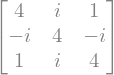

In [3]:
M = Matrix(( [4, I, 1], [-I, 4, -I], [1, I, 4] ))
M

Verificar si se trata de un operador normal, para ello encontrar adjunto y ver si conmuta con su adjunto


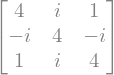

In [4]:
MA= M.adjoint()
MA

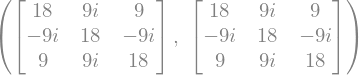

In [5]:
Lado_izq=M*MA
Lado_der=MA*M
Lado_izq, Lado_der

El resultado muestra que conmuta con su adjunto, se verifica que M es normal...Ahora procedemos a realizar la descomposición espectral, lo primero será encontrar los valores y vectores propios:

In [6]:
valores=M.eigenvals(simplify= True)
valores

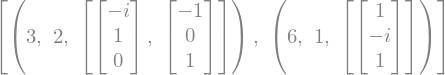

In [7]:
vectores=M.eigenvects()
vectores

In [8]:
type(vectores)

list

Observar que el resultado nos da una lista, en la cual aparace primero el valor propio, después la multiplicidad geométrica y luego el o los vectores asociados a dicho valor. En este caso para el primer valor propio se observa que la multiplicidad geométrica es 2, por lo cual se intuye que el espacio propio es un plano, habra que buscar ese espacio propio, observar que los vectores asociados al valor propio 3 son ortogonales al correspondiente al valor propio 6, como esperamos tratándose de un operador normal. Sin embargo los vectores de la base asociados valor propio 3 no son ortogonales, por lo cual habrà que asociar a ellos una base ortogonal.

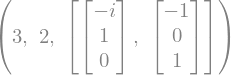

In [9]:
vectores[0]

In [41]:
type(vectores[0])

tuple

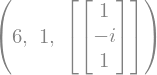

In [10]:
vectores[1]

In [43]:
type(vectores[1])

tuple

Observar que en este caso que los elementos de la lista vectores son tuplas, aquí se deberá tener cuidado para extraer los elementos de la tupla, utilizar la sintaxis apropiada para realizar el desempaquetamiento de la tupla y la selección de los vectores:

In [20]:
print(len(vectores[0]))

3


El resultado anterior nos muestra que la tupla tiene 3 elemenos, a nosotros solo nos interesan el primer y tercer elemento  de cada tupla, valor propio y vectore(s), como el segundo no nos interesa no le asignaremos variable y eso lo hacemos con un guion bajo:

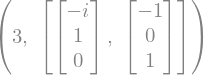

In [11]:
val1,_,vect1=vectores[0]
val1,vect1

In [23]:
type(vect1)

list

Observe que ahora los vectores propios quedaron contenidos en una lista, de allí ya los podemos extraer:

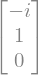

In [12]:
v1= vect1[0]
v1

In [25]:
type(v1)

sympy.matrices.dense.MutableDenseMatrix

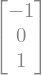

In [13]:
v2= vect1[1]
v2

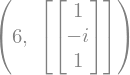

In [14]:
val2,_,vect2=vectores[1]
val2,vect2

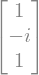

In [15]:
v3= Matrix([[1],[-I],[1]])
v3

In [73]:
type(v3)

sympy.matrices.dense.MutableDenseMatrix

Revisar si los vectores forman o no una base ortonormal>

In [74]:
v1.dot(v3)

In [75]:
v2.dot(v3)

Observar que los vectores v2 y v3 son ortogonales, por lo cual de los dos vectores asociados al valor propio 3, tomamos v2. Ahora debemos verificar que están normalizados:

In [76]:
v2.norm()

In [77]:
v3.norm()

Como la base no es ortogonal, se procede a ortonormalizarlos:

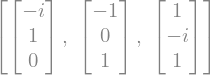

In [6]:
from sympy import Matrix
S = [Matrix([-I,1,0]), Matrix([-1,0,1]), Matrix([1,-I,1])]
#S = [Matrix([-I,1,0]), Matrix([-1,0,1])]
S

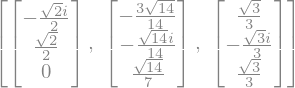

In [84]:
Orto=GramSchmidt(S,True) # hay un problema con este proceso
Orto

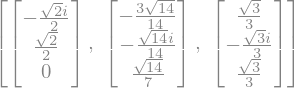

In [15]:
S2=Matrix.orthogonalize(*S,normalize= True)
S2

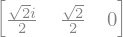

In [8]:
v2a=S2[0].adjoint()
v2a

Observe que el vector se ha traspuesto y conjugado, ahora se procede a construir el operador de proyección:

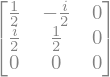

In [11]:
P1=S2[0]*S2[0].adjoint()
display(P1)

In [ ]:
Se procede de igual manera con los otros dos vectores

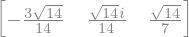

In [88]:
v2a=S2[1].adjoint()
v2a

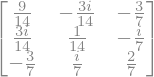

In [12]:
P2=S2[1]*S2[1].adjoint()
P2

Se construye un operador para el subespacio propio asociado al valor propio 3

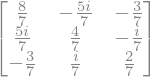

In [90]:
P12=P1+P2
P12

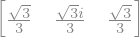

In [91]:
v3a=S2[2].adjoint()
v3a

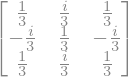

In [13]:
P3=S2[2]*S2[2].adjoint()
P3

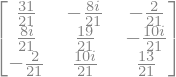

In [14]:
Pt= P1+P2+P3
Pt

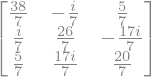

In [70]:
MD= 3*P1+3*P2+6*P3
MD

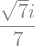

In [96]:
Orto[0].dot(Orto[1])

In [97]:
Orto[0].norm()

In [98]:
Orto[1].norm()

In [99]:
Orto[2].norm()

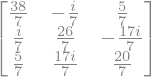

In [101]:
Descomposicion= 3*P12+6*P3
Descomposicion

# Trabajando con Numpy

In [80]:
M2 = np.array([[4,1j,1], [-1j,4,-1j], [1,1j,4]])
M2

array([[ 4.+0.j,  0.+1.j,  1.+0.j],
       [-0.-1.j,  4.+0.j, -0.-1.j],
       [ 1.+0.j,  0.+1.j,  4.+0.j]])

In [82]:
np.linalg.eig(M2)

(array([3.+8.62666325e-19j, 6.-8.62666325e-19j, 3.+2.22044605e-16j]),
 array([[ 8.16496581e-01+0.00000000e+00j,  5.77350269e-01+0.00000000e+00j,
         -5.63537246e-02+7.72508685e-02j],
        [-1.76091026e-19+4.08248290e-01j,  4.98060635e-19-5.77350269e-01j,
         -7.72508685e-02+6.73001073e-01j],
        [-4.08248290e-01-1.76091026e-19j,  5.77350269e-01+4.98060635e-19j,
          7.29354797e-01+0.00000000e+00j]]))